<a href="https://colab.research.google.com/github/alpolo1991/analisis_de_datos_G77/blob/main/RegresionLogistica_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística

## Algoritmos de Aprendizaje Supervisado

### Titanic Dataset

**Descripción:**

El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y tripulantes.

Si bien había algún elemento de suerte involucrado en la supervivencia, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

### **Objetivo**

Analisar y responder las preguntas planteadas sobre el dataset, "¿qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

### **Descripción del Conjunto de Datos:**

El archivo CSV proporcionado incluye las siguientes columnas:

PassengerId: Identificador único para cada pasajero.

Survived: Indica si el pasajero sobrevivió (1) o no (0).

Pclass: Clase del boleto (1 = Primera, 2 = Segunda, 3 = Tercera).

Name: Nombre del pasajero.

Sex: Sexo del pasajero.

Age: Edad del pasajero.

SibSp: Número de hermanos/cónyuges a bordo.

Parch: Número de padres/hijos a bordo.

Ticket: Número del boleto.

Fare: Tarifa pagada por el boleto.

Cabin: Número de cabina (si disponible).

Embarked: Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton).

### **Objeto a Analizar:**

Posible objeto de análisis podría ser identificar los factores más influyentes en la supervivencia de los pasajeros. tales como incluir las variables como la clase del boleto, el sexo, la edad, entre otros.

## 1. Definición del Problema y Objetivos:

¿Qué queremos lograr? Establecer claramente el objetivo del análisis (predecir, clasificar, segmentar, etc.).
¿Qué preguntas queremos responder? Definir las preguntas específicas que los datos pueden ayudar a responder.

## 2. Recopilación de Datos:

Identificar fuentes: Bases de datos, archivos, APIs, encuestas, etc.
Extraer datos: Obtener los datos de las fuentes y almacenarlos en un formato adecuado (CSV, Excel, bases de datos relacionales).

## 3. Limpieza y Preparación de Datos:

Manejar valores faltantes: Eliminar registros, imputar valores (media, mediana, moda, imputación por modelos).
Corregir inconsistencias: Identificar y corregir errores, duplicados, valores fuera de rango.
Transformar datos: Normalizar, estandarizar, discretizar, crear nuevas variables, codificar variables categóricas.
Reducir dimensionalidad: PCA, t-SNE, selección de características.

## 4. Exploración de Datos (EDA):

Visualización: Histogramas, diagramas de caja, gráficos de dispersión, matrices de correlación, gráficos de barras.
Estadísticas descriptivas: Media, mediana, moda, desviación estándar, cuartiles, correlación.
Análisis univariado y bivariado: Analizar cada variable individualmente y las relaciones entre pares de variables.

## 5. Modelado:

Seleccionar el algoritmo: Regresión lineal, logística, árboles de decisión, random forest, SVM, redes neuronales, clustering (K-means, jerárquico, DBSCAN), etc.
Entrenar el modelo: Ajustar los parámetros del modelo a los datos de entrenamiento.
Evaluar el modelo: Utilizar métricas adecuadas (MSE, RMSE, precisión, recall, F1-score, matriz de confusión, curva ROC) y técnicas como validación cruzada.

## 6. Interpretación de Resultados:

Explicar los resultados: Analizar los coeficientes del modelo, la importancia de las características, los clusters obtenidos, etc.
Visualizar los resultados: Crear gráficos y visualizaciones que faciliten la comprensión de los resultados.
Contestar las preguntas iniciales: Verificar si los resultados del modelo responden a las preguntas planteadas al inicio del análisis.

## 7. Comunicación de Resultados:

Crear reportes: Presentar los resultados de forma clara y concisa utilizando tablas, gráficos y texto.
Hacer recomendaciones: Basadas en los resultados del análisis, hacer recomendaciones para la toma de decisiones.
Técnicas Adicionales:

Feature engineering: Crear nuevas características a partir de las existentes para mejorar el rendimiento del modelo.
Regularización: Lasso, Ridge, para evitar el sobreajuste.
Aprendizaje profundo: Redes neuronales profundas para tareas complejas como visión por computadora y procesamiento de lenguaje natural.
Aprendizaje por refuerzo: Para tomar decisiones secuenciales en entornos dinámicos.
Herramientas:

Python: Pandas, NumPy, Scikit-learn, TensorFlow, PyTorch
R: dplyr, tidyr, ggplot2, caret
SQL: Para trabajar con bases de datos relacionales
Herramientas de visualización: Tableau, Power BI
Plataformas de Big Data: Hadoop, Spark

### Recopilación de Datos:

Carga de librerias básicas necesarias.

In [1]:
# Importar bibliotecas
import pandas as pd # Cargar y manipular el dataset.
import numpy as np # Realizar cálculos numéricos.
import matplotlib.pyplot as plt # Para la visualización de datos.
import seaborn as sns # Para la visualización de datos.
import plotly.express as px # Para la visualización de datos.
# import plotly.graph_objects as go # Para la visualización de datos.

# Importa la función para calcular métricas de evaluación
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error # r2_score, precision_score, recall_score, f1_score

# train_test_split: Importa la función para dividir datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split, cross_val_score, KFold

##Model Evaluations
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

## Warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Version de Python y librerias

In [2]:
# Version de Python y librerias

# python3 -m pip list
# python3 -m pip freeze > requirements.txt
!python --version
print("Pandas: ", pd.__version__)
print("Numpy: ", np.__version__)
import matplotlib # Importing the main matplotlib module
print("Matplotlib: ", matplotlib.__version__) # Access version from the main module
print("Seaborn: ", sns.__version__)
import plotly # Import the main plotly module
print("Plotly: ", plotly.__version__) # Access version from the main module

Python 3.10.12
Pandas:  2.2.2
Numpy:  1.26.4
Matplotlib:  3.8.0
Seaborn:  0.13.2
Plotly:  5.24.1


# Recopilación de Datos:

Identificar fuentes: Bases de datos, archivos, APIs, encuestas, etc.

Extraer datos: Obtener los datos de las fuentes y almacenarlos en un formato adecuado (CSV, Excel, bases de datos relacionales).

### Carga de datos

In [31]:
# Carga de datos

file_name = 'Titanic-Dataset.csv'

df_titanic = pd.read_csv(file_name, delimiter=',')

# Limpieza y Preparación de Datos:

Manejar valores faltantes: Eliminar registros, imputar valores (media, mediana, moda, imputación por modelos).
Corregir inconsistencias: Identificar y corregir errores, duplicados, valores fuera de rango.
Transformar datos: Normalizar, estandarizar, discretizar, crear nuevas variables, codificar variables categóricas.
Reducir dimensionalidad: PCA, t-SNE, selección de características.

### Información de dataset - Muestra de las primeras 15 filas.

In [4]:
# Información de dataset - Muestra de las primeras 15 filas.

df_titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Información del dataset

In [5]:
# Información del dataset

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Nombre de columnas y cantidad de filas y columnas.

In [6]:
# Nombre de columnas y cantidad de filas y columnas.

print(df_titanic.shape)
print(df_titanic.columns.values.tolist())


(891, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


### Validamos si cuenta con valores faltantes

In [7]:
# Validamos si cuenta con valores faltantes

print("Valores faltantes: ")
print(df_titanic.isnull().sum())

Valores faltantes: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Eliminar columnas innecesarias

In [35]:
# Eliminar columnas innecesarias

df_titanic = df_titanic.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

In [9]:
df_titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
# Validamos si cuenta con valores faltantes

print("Valores faltantes: ")
print(df_titanic.isnull().sum())

Valores faltantes: 
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


### Manejamos los valores nulos agregando la media y la moda para tener datos persistentes.

In [32]:
# Manejamos los valores nulos agregando la media y la moda para tener datos persistentes.

media_edad = df_titanic['Age'].mean()
moda_embarque = df_titanic['Embarked'].mode()[0]

print("Media de edad: ", media_edad)
print("Moda de embarque: ", moda_embarque)

Media de edad:  29.69911764705882
Moda de embarque:  S


In [33]:
# Aplicamos los cambios.

df_titanic['Age'].fillna(media_edad, inplace=True)
df_titanic['Embarked'].fillna(moda_embarque, inplace=True)

In [14]:
# Mostrar los 5 datos.

df_titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [36]:
# Validamos si cuenta con valores faltantes

print("Valores faltantes: ")
print(df_titanic.isnull().sum())

Valores faltantes: 
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [37]:
# Eliminamos valores faltantes en caso que los halla

print("Cantidad de filas antes de eliminar valores nulos: ", len(df_titanic))
df_titanic = df_titanic.dropna()
print("Cantidad de filas después de eliminar valores nulos: ", len(df_titanic))

Cantidad de filas antes de eliminar valores nulos:  891
Cantidad de filas después de eliminar valores nulos:  891


### Copy data

In [52]:
df_data = df_titanic.copy()

## Datos estadistica descritiva

In [53]:
# Datos estadistica descritiva

print("Estadística Descritiva: ")
df_data.describe(percentiles=[0.60, 0.70, 0.80, 0.90, 0.95, 0.99]).T

Estadística Descritiva: 


,count,mean,std,min,50%,60%,70%,80%,90%,95%,99%,max
Survived,891.0,0.383838,0.486592,0.00,0.000000,0.000000,1.0,1.0000,1.0000,1.00000,1.00000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,3.000000,3.000000,3.0,3.0000,3.0000,3.00000,3.00000,3.0000
Age,891.0,29.699118,13.002015,0.42,29.699118,29.699118,32.5,38.0000,47.0000,54.00000,65.00000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.000000,0.000000,1.0,1.0000,1.0000,3.00000,5.00000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.000000,0.000000,0.0,1.0000,2.0000,2.00000,4.00000,6.0000
Fare,891.0,32.204208,49.693429,0.00,14.454200,21.679200,27.0,39.6875,77.9583,112.07915,249.00622,512.3292


### Revisamos si existe valores duplicados

In [44]:
# Revisamos si existe valores duplicados

print("Valores duplicados: ", df_data.duplicated().sum())

Valores duplicados:  111


### Vemos si hay valores duplicados y los mostramos

In [54]:
# Vemos si hay valores duplicados y los mostramos

df_data[df_data.duplicated()]
# df_heart_cleveland[df_heart_cleveland.duplicated].shape

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
47,1,3,female,29.699118,0,0,7.7500,Q
76,0,3,male,29.699118,0,0,7.8958,S
77,0,3,male,29.699118,0,0,8.0500,S
87,0,3,male,29.699118,0,0,8.0500,S
95,0,3,male,29.699118,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
870,0,3,male,26.000000,0,0,7.8958,S
877,0,3,male,19.000000,0,0,7.8958,S
878,0,3,male,29.699118,0,0,7.8958,S
884,0,3,male,25.000000,0,0,7.0500,S


### Convirtiendo genero a datos binario -> Female: 0 y Male: 1

In [55]:
# Female: 0 y Male: 1

df_data['Sex'] = df_data['Sex'].map({'female': 0, 'male': 1})

df_data['Sex'].head(5)

,Sex
0,1
1,0
2,0
3,0
4,1


### Convirtiendo columna Embarked a datos numéricos

In [56]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Ajustar y transformar los datos

df_data['Embarked'] = label_encoder.fit_transform(df_data['Embarked'])

df_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1
6,0,1,1,54.000000,0,0,51.8625,2
7,0,3,1,2.000000,3,1,21.0750,2
8,1,3,0,27.000000,0,2,11.1333,2
9,1,2,0,14.000000,1,0,30.0708,0


# Exploración de Datos "Exploratory Data Analysis" (EDA):

Visualización: Histogramas, diagramas de caja, gráficos de dispersión, matrices de correlación, gráficos de barras.

Estadísticas descriptivas: Media, mediana, moda, desviación estándar, cuartiles, correlación.

Análisis univariado y bivariado: Analizar cada variable individualmente y las relaciones entre pares de variables.

## Columna edad - Edad minima y edad maxima

In [58]:
# Columna edad - Edad minima y edad maxima

df_data['Age'].min(), df_data['Age'].max()

(0.42, 80.0)

In [60]:
df_data['Age'].describe()

,Age
count,891.000000
mean,29.699118
std,13.002015
min,0.420000
25%,22.000000
50%,29.699118
75%,35.000000
max,80.000000


### Obtenes las columnas que solo tienen datos númericos

In [66]:
# Obtenes las columnas que solo tienen datos númericos

df_data_numerical = df_data.select_dtypes(exclude=['object'])

df_data_numerical.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Mostramos los datos por columna

In [69]:
# Mostramos las edades

age = df_data_numerical['Age'].value_counts()
age.columns = ['Age', 'count']

age.head(10)

,count
Age,
29.699118,177
24.000000,30
22.000000,27
18.000000,26
28.000000,25
30.000000,25
19.000000,25
21.000000,24
25.000000,23


## Valores atípicos edad

<Axes: >

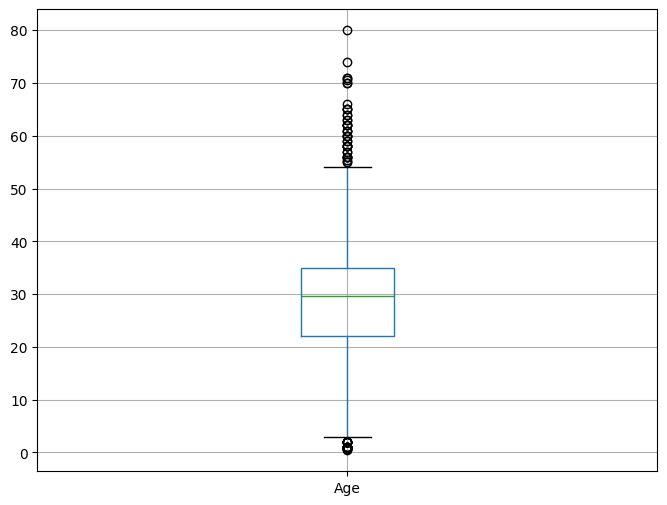

In [70]:
# Valores atípicos edad

df_data_numerical.boxplot(column=['Age'], figsize=(8,6))

## Grafico de histogram age x sex

In [72]:
# Grafico de histogram age x sex

fig = px.histogram(df_data, x="Age", color="Sex", barmode="group")
fig.update_layout(
    title="Distribución de Edad por Género",
    xaxis_title="Edad",
    yaxis_title="Frecuencia",
    legend_title="Género"
)
fig.show()

In [76]:
df_data_numerical['Sex'].value_counts()

,count
Sex,
1,577
0,314


In [77]:
sex = df_data_numerical['Sex'].value_counts().reset_index()
sex.columns = ['Sex', 'Cantidad']

if sex.loc[0, 'Sex'] == 1:
    sex.loc[0, 'sex'] = 'Male'
    sex.loc[1, 'sex'] = 'Female'

sex

,Sex,Cantidad,sex
0,1,577,Male
1,0,314,Female


### Distribución de Edad

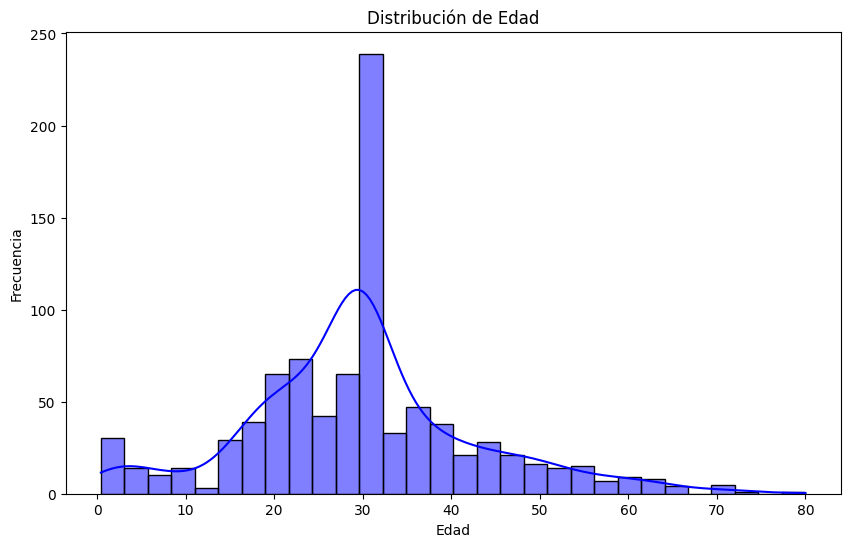

In [78]:
# Distribución de Edad

plt.figure(figsize=(10, 6))
sns.histplot(df_data['Age'], kde=True, color="blue")
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## Gráfico de Trazar la columna de media, mediana y moda de edad usando sns

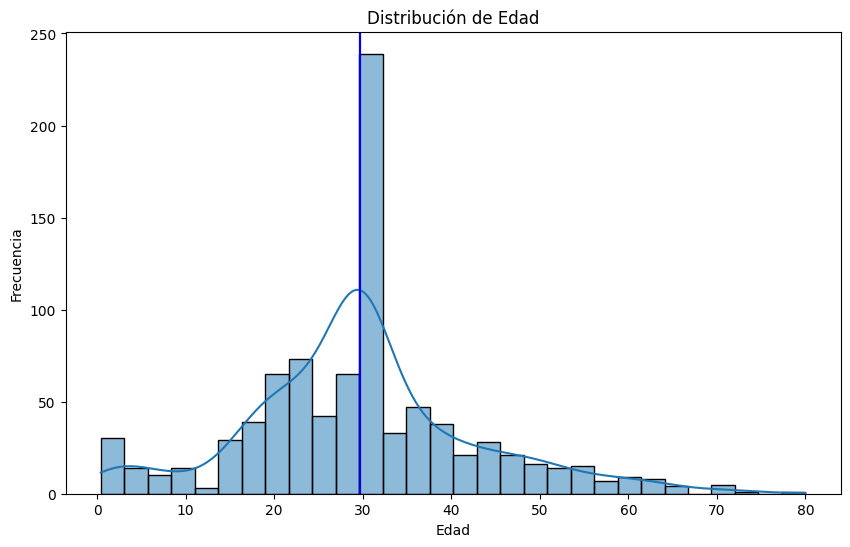

In [80]:
# Gráfico de Trazar la columna de media, mediana y moda de edad usando sns

plt.figure(figsize=(10, 6))
sns.histplot(df_data['Age'], kde=True)
plt.axvline(df_data['Age'].mean(), color='Red')
plt.axvline(df_data['Age'].median(), color= 'Green')
plt.axvline(df_data['Age'].mode()[0], color='Blue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### Mostramos por pantalla el valor de la columna media, mediana y moda de edad.

In [82]:
# Mostramos por pantalla el valor de la columna media, mediana y moda de edad.

print('Mean -> Media: ', df_data['Age'].mean())
print('Median -> Mediana: ', df_data['Age'].median())
print('Mode -> Moda', df_data['Age'].mode())

Mean -> Media:  29.69911764705882
Median -> Mediana:  29.69911764705882
Mode -> Moda 0    29.699118
Name: Age, dtype: float64


## Calcular el porcentaje de recuentos de valores masculinos y femeninos en los datos

In [83]:
# @title Calcular el porcentaje de recuentos de valores masculinos y femeninos en los datos

male_count = df_data['Sex'].value_counts()[1]
female_count = df_data['Sex'].value_counts()[0]

print(f'Hombres: {male_count}')
print(f'Mujeres: {female_count}')

total_count = male_count + female_count

# Calcular porcentaje
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

# Mostrar resultados
print(f'Porcentaje Hombres: {male_percentage:.2f}%')
print(f'Porcentaje Mujeres: {female_percentages:.2f}%')

# Porcentaje de Diferencia
difference_percentage = ((male_count - female_count)/female_count) * 100
print(f'Lo Hombres son un {difference_percentage:.2f}% mas que las mujeres.')


Hombres: 577
Mujeres: 314
Porcentaje Hombres: 64.76%
Porcentaje Mujeres: 35.24%
Lo Hombres son un 83.76% mas que las mujeres.


In [84]:
male_count/female_count

1.8375796178343948

## Encuentre el recuento de valores de la columna de edad agrupada por columna de sexo

In [85]:
# Encuentre el recuento de valores de la columna de edad agrupada por columna de sexo

df_data.groupby('Sex')['Age'].value_counts()

Sex  Age      
0    29.699118    53
     24.000000    16
     18.000000    13
     22.000000    12
     30.000000    11
                  ..
1    57.000000     1
     66.000000     1
     70.500000     1
     74.000000     1
     80.000000     1
Name: count, Length: 147, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

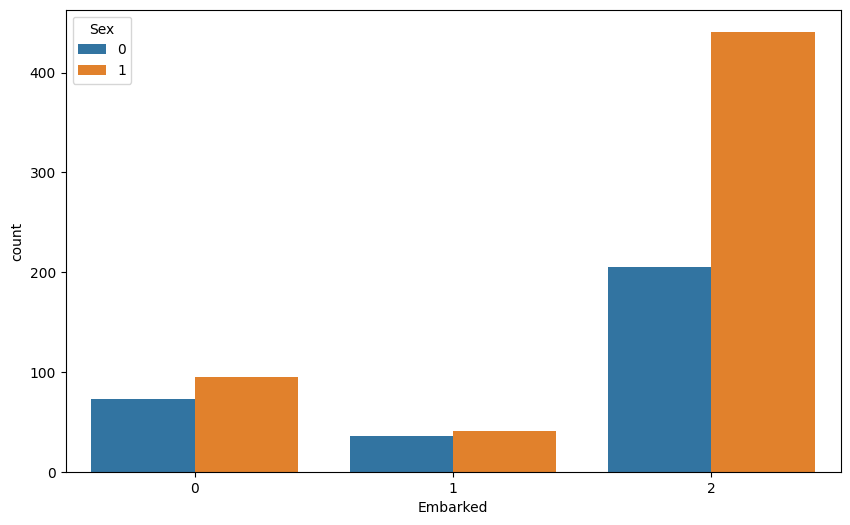

In [89]:
# Cuenta grafica plot de Embarked columna y sex column

plt.figure(figsize=(10, 6))
sns.countplot(df_data_numerical, x='Embarked', hue= 'Sex')

In [98]:
# Cuenta grafica plot de Survived columna y sex column

plt.figure(figsize=(10, 6))
# sns.countplot(df_data_numerical, x='Survived', hue= 'Sex')
fg = px.histogram(df_data_numerical, x='Survived', color='Sex', barmode="group")
fg = fg.update_layout(
    title="Distribución de Sobrevivientes por Sexo",
    xaxis_title="Sobrevivientes",
    yaxis_title="Frecuencia",
    legend_title="Sexo"
)
fg.show()

<Figure size 1000x600 with 0 Axes>

In [102]:
# Cuenta grafica plot de Survived columna y sex column

plt.figure(figsize=(10, 6))
fg = px.histogram(df_data_numerical, x='Age', color='Survived', barmode="group")
fg = fg.update_layout(
    title="Distribución de Sobrevivientes por Sexo",
    xaxis_title="Edad",
    yaxis_title="Frecuencia",
    legend_title="Sobrevivientes"
)
fg.show()

<Figure size 1000x600 with 0 Axes>

## Matrix de Correlación

In [104]:
# Matrix de Correlación

df_data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


In [105]:
correlations = df_data.corr()['Survived'].sort_values(ascending=False)

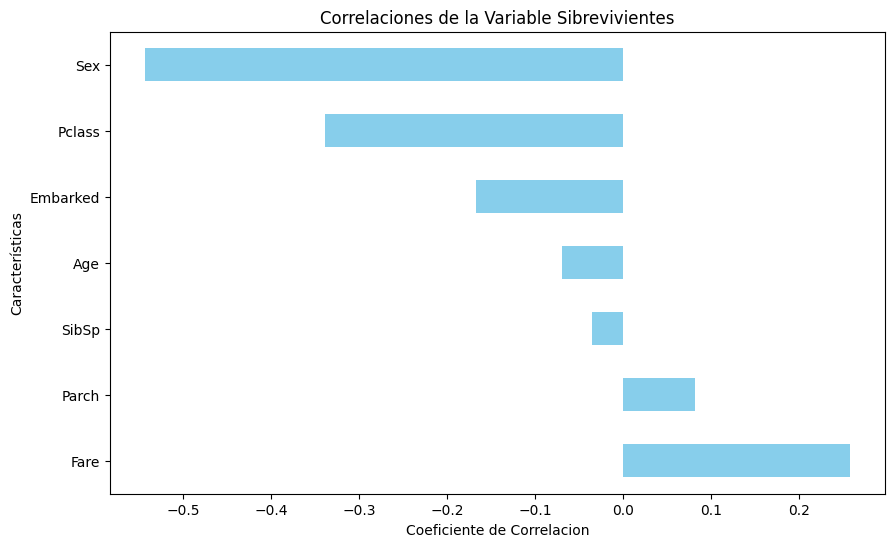

In [107]:
correlations.drop('Survived').plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Correlaciones de la Variable Sibrevivientes')
plt.xlabel('Coeficiente de Correlacion')
plt.ylabel('Características')
plt.show()

## Exploramos las correlaciones

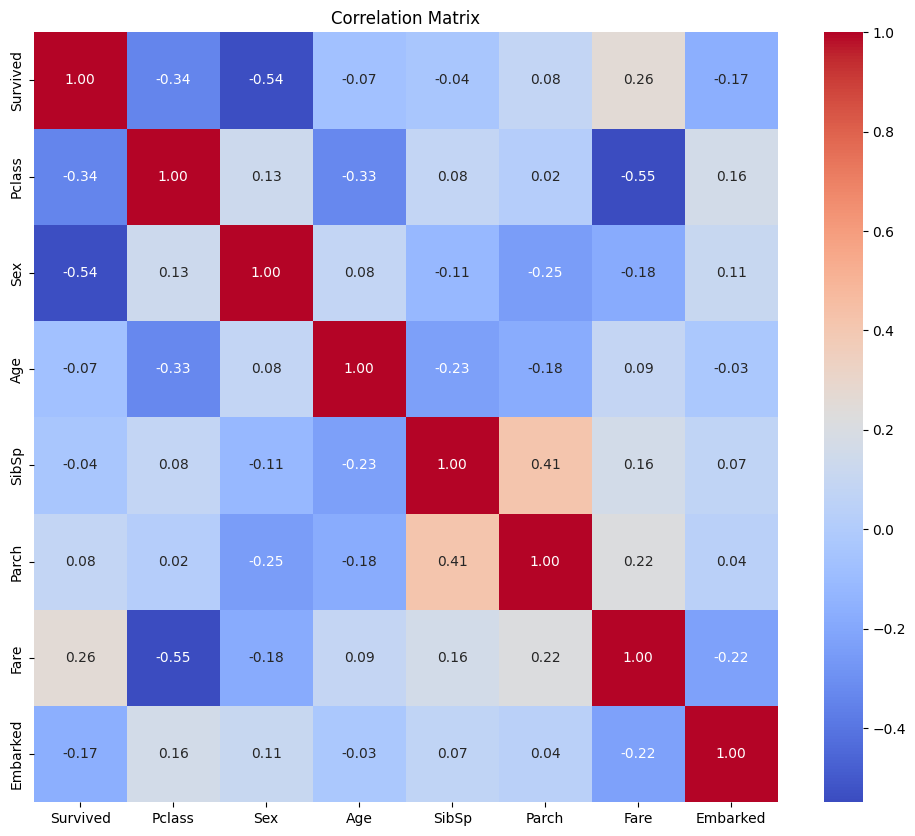

In [108]:
# Exploramos las correlaciones

plt.figure(figsize=(12,10))
corr_matrix = df_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Correlacción con el objetivo = condition

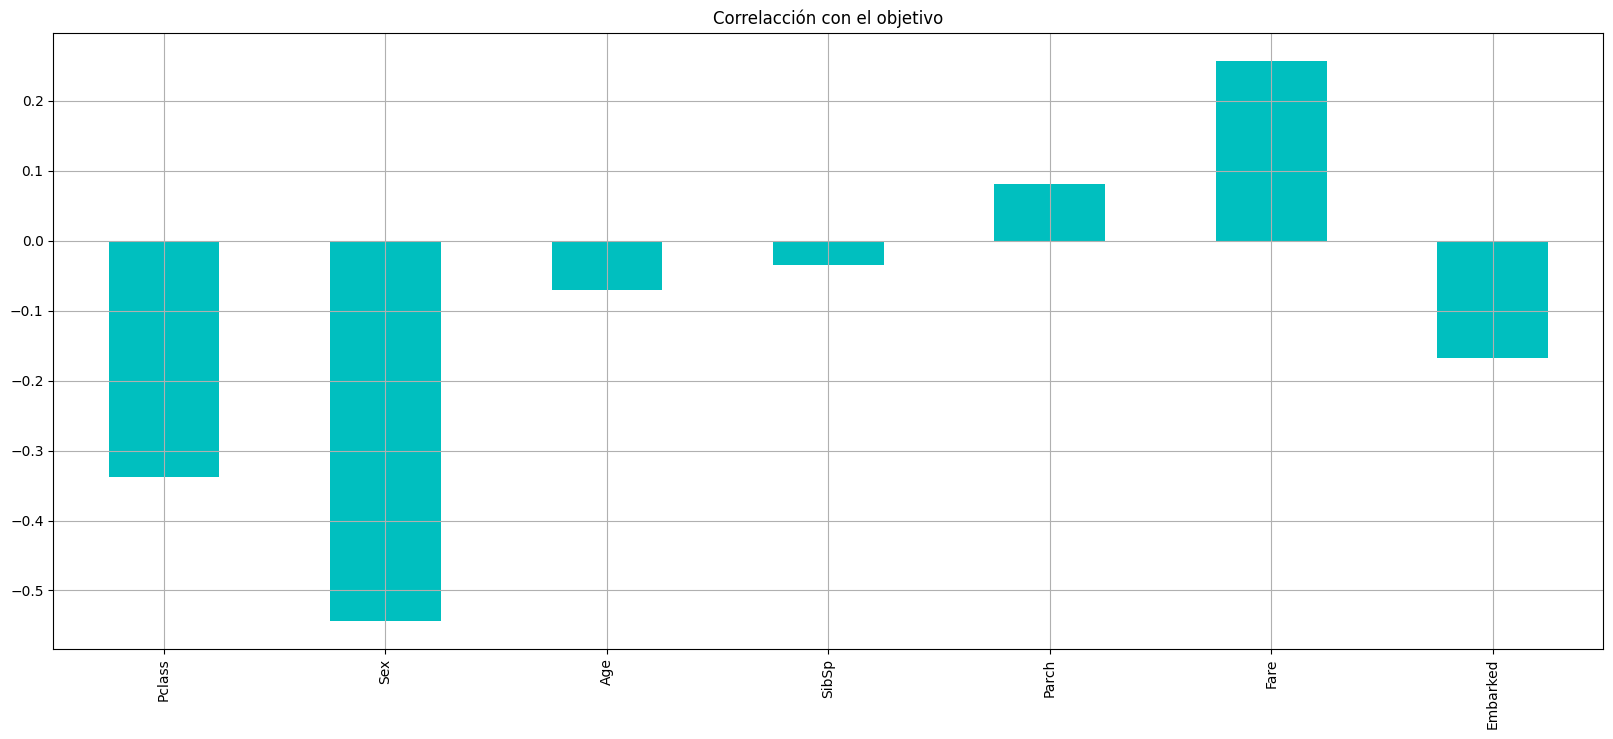

In [109]:
# Correlacción con el objetivo = Survived

df_data.drop('Survived', axis=1).corrwith(df_data['Survived']).plot(kind='bar', figsize=(20,8), grid=True, title='Correlacción con el objetivo', color='c');

## Mostramos grafica por genero.

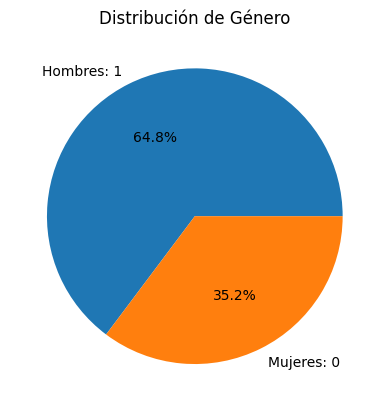

In [110]:
male = "Hombres: 1"
female = "Mujeres: 0"
sex = [male, female]

male_count = df_data['Sex'].value_counts()[1]
female_count = df_data['Sex'].value_counts()[0]

counts = [male_count, female_count]

plt.pie(counts, labels=sex, autopct='%1.1f%%')
_ = plt.title('Distribución de Género')

###  Cantidad de personas que sobrevivieron

In [111]:
# Cantidad de personas que sobrevivieron

df_data["Survived"].value_counts()

,count
Survived,
0,549
1,342


## Mostramos en un grafico de barra.

<Axes: xlabel='Survived'>

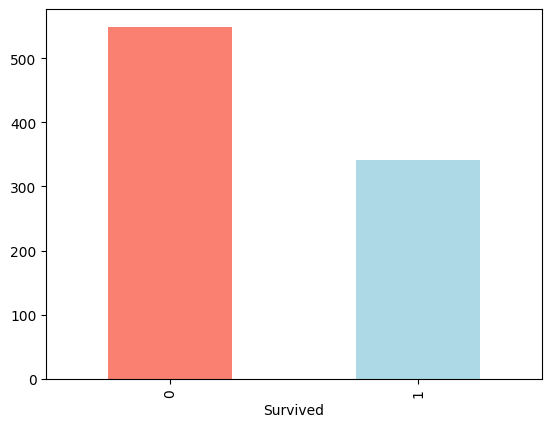

In [112]:
# Mostramos en un grafico de barra.

df_data["Survived"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

## Comparación columna sex y Survived

Text(0, 0.5, 'Frequency')

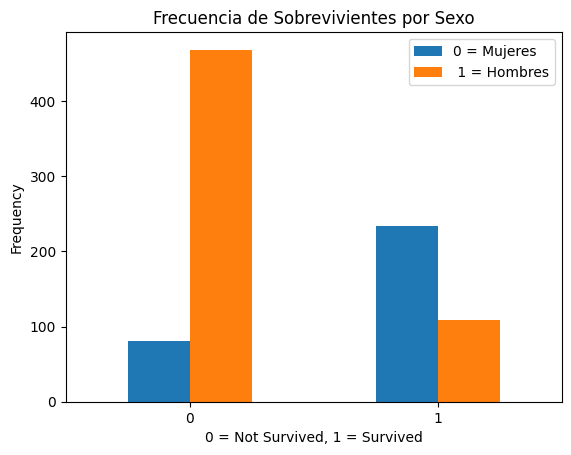

In [121]:
# Comparación columna sex y Survived

pd.crosstab(df_data['Survived'], df_data['Sex']).plot(kind="bar")
plt.title("Frecuencia de Sobrevivientes por Sexo")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.xticks(rotation=0)
plt.legend(["0 = Mujeres"," 1 = Hombres"])
plt.ylabel("Frequency")

# Modelado:

  ## Características:
  - Construir modelos matemáticos que representen las relaciones entre las variables y permitan hacer predicciones o clasificaciones.

  ## Ventajas:
  - Permite hacer inferencias y tomar decisiones basadas en los datos.

  ## Desventajas:
  - La elección del modelo adecuado puede ser compleja y requiere conocimientos técnicos.

  ## Técnicas:

  - Aprendizaje supervisado:
    - Regresión lineal, logística, árboles de decisión, random forest, SVM, redes neuronales.

  - Aprendizaje no supervisado:
    - Clustering (K-means, jerárquico, DBSCAN), reducción de dimensionalidad (PCA, t-SNE).

## Division de los datos para entrenar el modelo.

In [118]:
# Division de los datos para entrenar el modelo.

X_data = df_data.drop("Survived", axis=1)

y_data = df_data["Survived"]

In [119]:
X_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [120]:
y_data

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### División del dataset: Divide los datos en un conjunto de entrenamiento y otro de prueba, usando un 80% para entrenar el modelo y un 20% para probarlo.

In [122]:
# División del dataset: Divide los datos en un conjunto de entrenamiento y otro de prueba, usando un 80% para entrenar el modelo y un 20% para probarlo.
# Dividimos el dataset en características (X) y la variable objetivo (y). Luego, dividimos en conjuntos de entrenamiento y prueba para evaluar correctamente el modelo.

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [123]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [124]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.500000,0,0,28.5000,2
733,2,1,23.000000,0,0,13.0000,2
382,3,1,32.000000,0,0,7.9250,2
704,3,1,26.000000,1,0,7.8542,2
813,3,0,6.000000,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.000000,0,0,7.6500,2
270,1,1,29.699118,0,0,31.0000,2
860,3,1,41.000000,2,0,14.1083,2
435,1,0,14.000000,1,2,120.0000,2


In [125]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


## Seleción de Modelo

# Evaluación del Modelo:

  ## Características:
    - Evaluar el rendimiento del modelo utilizando métricas adecuadas y técnicas de validación.
  ## Ventajas:
    - Permite seleccionar el mejor modelo y garantizar su generalización.
  ## Desventajas:
    - Puede ser complejo interpretar las métricas y seleccionar las adecuadas.
  ## Técnicas:

    ### Métricas:
      - MSE, RMSE, precisión, recall, F1-score, matriz de confusión, curva ROC, AUC.
    ### Validación cruzada:
      - K-fold, leave-one-out.

## Cargamos y ejecutamos los modelos a evaluar.

In [126]:

models = {
    'Logistic Regression': LogisticRegression(solver="liblinear"),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Neural Network': MLPClassifier()
}

def train_models(models, X_train, y_train, y_test):
    for name, model in models.items():
      print(f"Entrenamiento -> Training {name}...")
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      print(f"{name} Exactitud -> Accuracy: {accuracy:.2f}")
      print(classification_report(y_test, y_pred))
      print("\n")

train_models(models, X_train, y_train, y_test)

Entrenamiento -> Training Logistic Regression...
Logistic Regression Exactitud -> Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



Entrenamiento -> Training Decision Tree...
Decision Tree Exactitud -> Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



Entrenamiento -> Training Random Forest...
Random Forest Exactitud -> Accuracy: 0.82
              precision    recall  f1-score   support

           0       0

## Evaluacion de los modelos entrenados -> Ocurrencia en los modelos.

In [128]:
# Evaluacion de los modelos entrenados -> Ocurrencia en los modelos.

def evaluate_model(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Exactitud: {accuracy:.2f}")
        # print(classification_report(y_test, y_pred))
        # print("\n")

evaluate_model(models, X_train, y_train, X_test, y_test)

Logistic Regression Exactitud: 0.79
Decision Tree Exactitud: 0.78
Random Forest Exactitud: 0.81
SVM Exactitud: 0.66
KNN Exactitud: 0.72
Gradient Boosting Exactitud: 0.81
XGBoost Exactitud: 0.80
AdaBoost Exactitud: 0.80
Naive Bayes Exactitud: 0.78
MLP Neural Network Exactitud: 0.79


## Comparación de los Modelos

Random Forest: 0.82
Gradient Boosting: 0.81
AdaBoost: 0.80
XGBoost: 0.80
Logistic Regression: 0.79
MLP Neural Network: 0.78
Naive Bayes: 0.78
Decision Tree: 0.77
KNN: 0.72
SVM: 0.66


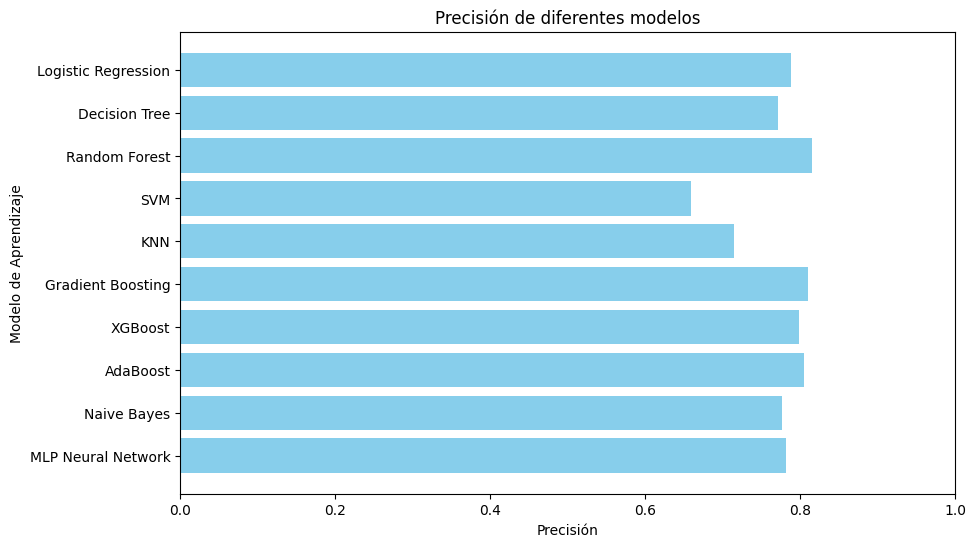

In [129]:
# Comparación de los Modelos

# Diccionario para almacenar precisiones
accuracies = {}

def compare_models(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[name] = accuracy

compare_models(models, X_train, y_train, X_test, y_test)

# Ordenar los modelos por precisión en orden descendente
sorted_models = dict(sorted(accuracies.items(), key=lambda x: x[1], reverse=True))

# Mostrar los modelos ordenados
for model_name, accuracy in sorted_models.items():
    print(f"{model_name}: {accuracy:.2f}")

# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Precisión')
plt.ylabel('Modelo de Aprendizaje')
plt.title('Precisión de diferentes modelos')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()

# Entrenamiento individual y prodicciones del modelo logistica de regression.

In [130]:
# Entrenamiento individual y prodicciones del modelo logistica de regression.

model_lr = models['Logistic Regression']

model_train = model_lr.fit(X_train, y_train)

model_pred_rl = model_train.predict(X_test)

In [131]:
# Predicciones del modelo Regression Logistica
model_pred_rl

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

## Vamos a analizar por medio de una grafica la matrix de confusion del modelo Reregression Logistica

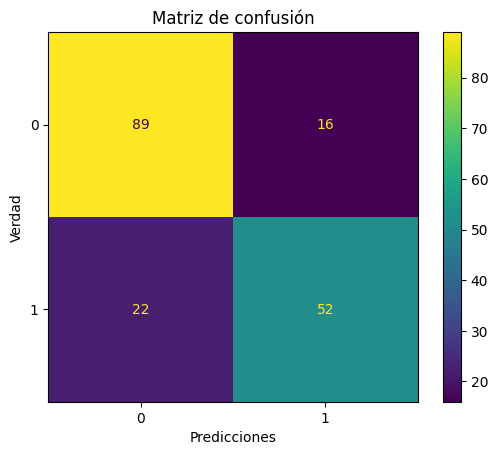

In [134]:
# Vamos a analizar por medio de una grafica la matrix de confusion del modelo Reregression Logistica

# sns.set(font_scale=1.5) # Increase font size
# def plot_conf_mat(y_test, y_pred):
#     """
#     Traza una matriz de confusión utilizando el mapa de calor de Seaborn().
#     """
#     fig, ax = plt.subplots(figsize=(6, 6))
#     ax = sns.heatmap(confusion_matrix(y_test, y_pred),
#                      annot=True, # Annotate the boxes
#                      cbar=False)
#     plt.xlabel("Predicciones") # predictions go on the x-axis
#     plt.ylabel("Verdad") # true labels go on the y-axis

# # plot_conf_mat(y_test, y_pred = model_pred_rl)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred = model_pred_rl),
                       display_labels=models['Logistic Regression'].classes_).plot()
plt.title("Matriz de confusión")
plt.xlabel("Predicciones")
plt.ylabel("Verdad")
plt.show()

# Desempeño del modelo de Regressión Logistica

In [135]:
# Desempeño del modelo de Regressión Logistica

print(classification_report(y_test, y_pred = model_pred_rl))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



# Coeficiente y/o Interceción del modelo

In [137]:
coef = model_lr.coef_ # Coeficientes
intercepcion = model_lr.intercept_ # Intercepto

print("Coeficiente: ", coef)
print("Intercepción: ", intercepcion)

Coeficiente:  [[-0.69242141 -2.45853814 -0.02093917 -0.27853564 -0.1041555   0.00499598
  -0.13986599]]
Intercepción:  [3.42646111]


# Coeficientes por columnas

In [138]:
# Coeficientes por columnas

coef_values = model_lr.coef_[0] # Coeficientes
print("Coeficientes :")

num = 0
for feature, coef in zip(X_data.columns, coef_values):
  num += 1
  print(f"Coeficiente ({feature}, β{num}: {coef}")

Coeficientes :
Coeficiente (Pclass, β1: -0.6924214091982173
Coeficiente (Sex, β2: -2.458538144347949
Coeficiente (Age, β3: -0.020939173021632524
Coeficiente (SibSp, β4: -0.2785356382551936
Coeficiente (Parch, β5: -0.1041555045161661
Coeficiente (Fare, β6: 0.004995982418051096
Coeficiente (Embarked, β7: -0.13986598688917148


### Coeficiente

In [139]:
# Coeficiente

feature_dict = dict(zip(df_data.columns, list(model_train.coef_[0])))
feature_dict

{'Survived': -0.6924214091982173,
 'Pclass': -2.458538144347949,
 'Sex': -0.020939173021632524,
 'Age': -0.2785356382551936,
 'SibSp': -0.1041555045161661,
 'Parch': 0.004995982418051096,
 'Fare': -0.13986598688917148}

### Curva ROC -> Es una representación gráfica de la sensibilidad frente a la razón de falsas alarmas para un sistema clasificador binario según se varía el umbral de discriminación

<Figure size 1000x600 with 0 Axes>

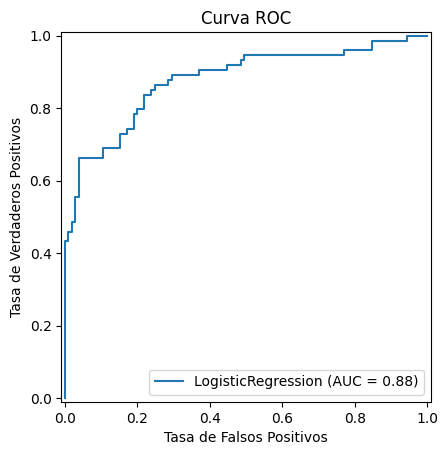

In [140]:
# Curva ROC

from sklearn.metrics import RocCurveDisplay

# Matriz de Confusión: Muestra la cantidad de verdaderos positivos, negativos, falsos positivos y falsos negativos.
plt.figure(figsize=(10, 6))
RocCurveDisplay.from_estimator(model_train, X_test, y_test)
plt.title("Curva ROC")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.show()

# Curva ROC

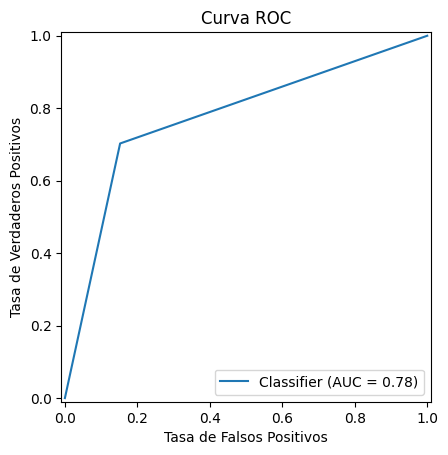

In [141]:
# Curva ROC

# ### Métricas:
#   - MSE, RMSE, precisión, recall, F1-score, matriz de confusión, curva ROC, AUC.
# ### Validación cruzada:
#   - K-fold, leave-one-out.
# Exactitud (Accuracy): Mide el porcentaje de predicciones correctas en relación con el total de predicciones.

# Precisión (Precision): Evalúa la proporción de verdaderos positivos sobre el total de predicciones positivas.

# Sensibilidad o Recall: Mide la capacidad del modelo para detectar todos los verdaderos positivos.

# F1 Score: Es la media armónica entre precisión y recall, útil cuando necesitas un balance entre ambas métricas.

# AUC-ROC: Representa la capacidad del modelo para distinguir entre clases. El área bajo la curva ROC es una buena métrica global de desempeño.

# Matriz de Confusión: Muestra la cantidad de verdaderos positivos, negativos, falsos positivos y falsos negativos.
RocCurveDisplay.from_predictions(y_test, model_pred_rl)
plt.title("Curva ROC")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.show()

# Evaluacion del modelo regresion logistica con algunas metricas

In [142]:
# Evaluacion del modelo regresion logistica con algunas metricas

# r2 = r2_score(y_test, model_pred_rl)
mse = mean_squared_error(y_test, model_pred_rl)
mae = mean_absolute_error(y_test, model_pred_rl)
rmse = np.sqrt(mean_squared_error(y_test, model_pred_rl))
vcross = cross_val_score(model_train, X_data, y_data, cv=KFold(5))

# print(f"Coeficiente de determinación R²: {r2}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")

print(f'El error cuadrático medio (RMSE) para el modelo en el primer paso es:: {rmse:.2f}')
print(f'La validación cruzada del modelo en el primer paso es: {vcross}')
print(f'La media de la validación cruzada del modelo en el primer paso es: {vcross.mean():.2f}')

Error Cuadrático Medio (MSE): 0.21
Error Absoluto Medio (MAE): 0.21
El error cuadrático medio (RMSE) para el modelo en el primer paso es:: 0.46
La validación cruzada del modelo en el primer paso es: [0.79329609 0.80337079 0.7752809  0.74719101 0.83707865]
La media de la validación cruzada del modelo en el primer paso es: 0.79


# Evaluacion del modelo regresion logistica con algunas metricas

In [143]:
# Evaluacion del modelo regresion logistica con algunas metricas

accuracy = accuracy_score(y_test, model_pred_rl)
precision = precision_score(y_test, model_pred_rl)
recall = recall_score(y_test, model_pred_rl)
f1 = f1_score(y_test, model_pred_rl)
roc_auc = roc_auc_score(y_test, model_pred_rl)

print(f'Exactitud: {accuracy:.2f}')
print(f'Precisión: {precision}')
print(f'Sensibilidad : {recall}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc}')

Exactitud: 0.79
Precisión: 0.7647058823529411
Sensibilidad : 0.7027027027027027
F1 Score: 0.73
AUC-ROC: 0.7751608751608752


### Comunicar Resultados.


### **Interpretación Matrix de Correlación:**
Survived y Sex (-0.543): Existe una correlación negativa significativa entre la supervivencia y el sexo. Esto indica que ser hombre está asociado con una menor probabilidad de supervivencia, mientras que ser mujer aumenta las probabilidades de supervivencia.

Survived y Pclass (-0.338): Hay una correlación negativa entre la supervivencia y la clase del boleto. Los pasajeros de primera clase tenían una mayor probabilidad de sobrevivir en comparación con los de tercera clase.

Survived y Fare (0.257): Existe una correlación positiva moderada entre la tarifa del boleto y la supervivencia. Los pasajeros que pagaron tarifas más altas tenían una mayor probabilidad de sobrevivir.

Survived y Embarked (-0.167): Hay una correlación negativa ligera entre el puerto de embarque y la supervivencia, lo que sugiere que algunos puertos de embarque podrían haber tenido un efecto en la probabilidad de supervivencia.

Survived y Age (-0.070): La correlación entre la edad y la supervivencia es baja y negativa, indicando que la edad no fue un factor significativo en la supervivencia.

SibSp y Parch (0.415): Existe una correlación positiva moderada entre la cantidad de hermanos/esposas a bordo (SibSp) y la cantidad de padres/hijos a bordo (Parch), lo cual tiene sentido ya que las familias viajaban juntas.

Pclass y Fare (-0.550): Hay una correlación negativa alta entre la clase del boleto y la tarifa, indicando que los boletos de clase más alta (primera clase) tenían tarifas más altas.

**Interpretación General**
En resumen, los factores más influyentes en la supervivencia fueron el sexo, la clase del boleto y la tarifa del boleto. Ser mujer, estar en primera clase y pagar una tarifa más alta aumentaron las probabilidades de supervivencia.

### **Resultados Interpretación Varios Modelos:**

Random Forest: Este modelo obtuvo la mayor exactitud (0.82) y buenos valores de precisión y recall para ambas clases (0 y 1). Es el modelo más equilibrado en términos de rendimiento general.

Gradient Boosting y XGBoost: Ambos modelos también muestran un buen rendimiento con exactitudes de 0.81 y 0.80 respectivamente. Tienen un buen balance entre precisión y recall.

Logistic Regression y Decision Tree: Ambos tienen una exactitud de 0.79, con la Regresión Logística mostrando una ligera ventaja en la clasificación de la clase 0.

SVM: Este modelo tiene una exactitud significativamente menor (0.66), indicando que no es adecuado para este dataset en particular.

KNN: Tiene una exactitud moderada de 0.72, pero su rendimiento no es tan bueno como otros modelos.

Naive Bayes y MLP Neural Network: Ambos tienen una exactitud similar de 0.78, con un rendimiento balanceado, pero ligeramente inferior a los modelos de bosque y boosting.

*En resumen,* el Random Forest parece ser el mejor modelo para este dataset, seguido de cerca por los métodos de boosting (Gradient Boosting y XGBoost).

# **Métricas del Modelo de Regresión Logística:**

**Error Cuadrático Medio (MSE):** 0.21

Indica el promedio de los errores al cuadrado entre los valores predichos y los valores reales. Un valor más bajo es mejor, ya que indica que las predicciones están más cerca de los valores reales.

**Error Absoluto Medio (MAE):** 0.21

Similar al MSE, pero toma el valor absoluto del error. También un valor más bajo es mejor.

**Raíz del Error Cuadrático Medio (RMSE):** 0.46

Es la raíz cuadrada del MSE. Proporciona una medida de error en la misma escala que los valores originales. Un valor más bajo indica mejores predicciones.

**Validación Cruzada:**

Valores de validación cruzada: [0.7933, 0.8034, 0.7753, 0.7472, 0.8371]

**Media de la validación cruzada:** 0.79

Esto sugiere que el modelo es consistente, ya que la exactitud promedio es alta y los valores individuales no varían demasiado.

**Exactitud:** 0.79

La proporción de predicciones correctas realizadas por el modelo.

**Precisión:** 0.7647

La proporción de verdaderos positivos entre los casos predichos como positivos. En otras palabras, de todas las veces que el modelo predijo que un pasajero sobrevivió, el 76.47% de las veces estaba en lo correcto.

**Sensibilidad (Recall):** 0.7027

La proporción de verdaderos positivos entre todos los casos que realmente son positivos. Significa que el modelo identifica correctamente el 70.27% de los pasajeros que realmente sobrevivieron.

**F1 Score:** 0.73

Es la media armónica de la precisión y la sensibilidad, proporcionando una medida equilibrada del rendimiento del modelo.

**AUC-ROC:** 0.7752

Área Bajo la Curva de la Característica Operativa del Receptor. Una métrica para evaluar la calidad del modelo. Un valor cercano a 1 indica un buen rendimiento.

### **Conclusión:**
El modelo de Regresión Logística muestra un rendimiento sólido con una exactitud de 0.79 y un buen equilibrio entre precisión y sensibilidad. La métrica de AUC-ROC de 0.7752 también indica que el modelo es capaz de discriminar bien entre las clases de supervivencia y no supervivencia.